# Lecture 6: Unboxing CO2 Data from Mauna Loa Observatory


## Introduction

In this lecture we examine the process of data cleaning and Exploratory Data Analysis (EDA). Often you will acquire or even be given a collection of data in order to conduct some analysis or answer some questions. The first step in using that data is to ensure that it is in the correct form (cleaned) and that you understand its properties and limitations (EDA). Often as you explore data through EDA you will identify additional transformations that may be required before the data is ready for analysis.

In this notebook we obtain CO2 data from the Mauna Loa observatory in Hawaii. 
These data are curated by NOAA Research (National Oceanic & Atmospheric Administration) and can be found at:
https://www.esrl.noaa.gov/gmd/ccgg/trends/mlo.html

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


## Unboxing the Data

We have downloaded some the latest data for CO2 emissions and placed them in the data folder. The first step to understanding the data is learning a bit about the file(s).

### How big is the data?

We often start looking at the data by getting a rough estimate of its size. This can help inform the tools we use and how we view the data. 

If the data are relatively small, we might use a text editor or a spreadsheet to look at them. If they are larger, 
then we might jump to more programmatic exploration or even used distributed computing tools.

The following command lists (`l`) the files with human (`h`) readable file sizes:

In [2]:
ls -lh data

total 188K
-rwxrwxrwx 1 hug hug 133K Sep 15 21:51 34565-0001-Data-Subset.txt*
-rwxrwxrwx 1 hug hug  50K Sep 15 21:51 co2_mm_mlo.txt*


In some file systems addition attributes describing the file may be available, e.g.,
you may want to try the file command:

In [3]:
!file data/co2_mm_mlo.txt

data/co2_mm_mlo.txt: ASCII text


Here we are invoking the shell command via the ! operator. 
The wc command below computes the number of lines, words, and characters in each file.

In [4]:
!wc data/co2_mm_mlo.txt

  810  5804 51131 data/co2_mm_mlo.txt


These command reveals a bit more about the structure of the data.

The file is relatively small and we could comfortably examine it in a text editor. (Some options are *sublime*, and *emacs*, or the very old school *vi*).

In listing the file, notice that the file name suffix *txt* suggests it is a text file, and this is 
confirmed by the *ASCII text* information from `file data`

Some common formats for plain text are delimited formats, e.g.,

 + CSV: Comma separated values 
 + TSV: Tab separated values
 
 
Later in this course, we will work with JSON (JavaScript Object Notation) files. 
This is a very standard semi-structured file format used to store nested data.

### What is the format?
We already noticed that the file ends in `txt` and the contents are ASCII text.
Let's use the head command to look at the first few lines in the file to try to determine if we have 
a delimited file of some kind.

In [5]:
!head -n 10 data/co2_mm_mlo.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 


We see that the file begins with information about the data. 
Each line begins with # indicating it is a comment.
We can continue looking and reading the header information.
When we do this, we find that the actual data begins on the 72 line of the file.

In [6]:
!head -n 80 data/co2_mm_mlo.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 
# ESRL should be informed at the outset of the nature of this work.  
# If the ESRL data are essential to the work, or if an important 
# result or conclusion depends on the ESRL data, co-authorship
# may be appropriate.  This should be discussed at an early stage in
# the work.  Manuscripts using the ESRL data should be sent to ESRL
# for review before they are submitted for publication so we can
# ensure that the quality and lim

### Reading About the Data

This is not always an option as:

1. There may be limited or no documentation.
2. Documentation may be out of date. (How will you know?)

In our case the documentation appears at the top of the file. 
We should read before we get started working with the data, but some times 
the urge to plunge into EDA wins over and we just start mucking about and 
discovery properties of the data as we go. 

### What are some observations about co2_mm_mlo.txt?

Looking at the first few lines of the file we spot some interesting features.

1. It appears the values are separated by white space, possibly tabs. 
2. Also, the values line up in the file, e.g., the month appears in 7th to 8th position. 
3. The 70th and 71st lines in the file contain column headings split over two lines.
4. It looks like some data are missing and that special values indicate missingness, 
e.g., -1 and -99.99 


### Loading the Data

We will now attempt to load the data into python. 
We will use the Pandas dataframe library for basic tabular data analysis. 
Fortunately, the Pandas library has some relatively sophisticated functions for loading data.

We use `read_csv` to read the data into a Pandas data frame.
We simply specify that the separators are white space,
there is no header (we will set our own field names), and to skip the first 72 rows of the file.

In [9]:
co2 = pd.read_csv('data/co2_mm_mlo.txt', header = None, skiprows = 72, 
                  sep = '\s+',
                  names = ['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'days'])

We check the head and tail of the data frame to make sure that the file was read properly.

In [10]:
co2.head()

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [11]:
co2.tail()

,Yr,Mo,DecDate,Avg,Int,Trend,days
733,2019,4,2019.292,413.32,413.32,410.49,26
734,2019,5,2019.375,414.66,414.66,411.20,28
735,2019,6,2019.458,413.92,413.92,411.58,27
736,2019,7,2019.542,411.77,411.77,411.43,23
737,2019,8,2019.625,409.95,409.95,411.84,29


### Preliminary observations on the data?

Yr -- Contain a four digit integer, which appears to range from 1958 to 2019

Mo -- Contains an integer that appears to represent the month

DecDate -- Represents the date in decimal format, e.g., year + no days/365

Avg -- The average monthly CO2 measurement, has -99.99 for missing. (any other weird values?)

Int  -- Int stands for interpolation, we read in the documentation that the value is the same as the average, unless it is missing, and then it's an interpolated value

days --  these are not the days in the month, but the days in operation (and the documentation says -1 is for missing)

## Data Checking and cleaning

How many rows should we have?

+ First observation was in March 1958
+ Last record was August 2019
+ Data is supposed to be monthly


The following simple calculation confirms 

In [12]:
12*(2019-1957) - 2 -  4

738

How many records per month?

In [13]:
2019-1957

62

In [14]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 7 columns):
Yr         738 non-null int64
Mo         738 non-null int64
DecDate    738 non-null float64
Avg        738 non-null float64
Int        738 non-null float64
Trend      738 non-null float64
days       738 non-null int64
dtypes: float64(4), int64(3)
memory usage: 40.4 KB


In [15]:
co2.describe()

,Yr,Mo,DecDate,Avg,Int,Trend,days
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,1988.417344,6.491870,1988.916667,350.472087,354.496057,354.483523,18.472900
std,17.768275,3.444944,17.765545,52.214201,28.113985,28.031320,12.200271
min,1958.000000,1.000000,1958.208000,-99.990000,312.660000,314.620000,-1.000000
25%,1973.000000,4.000000,1973.562750,328.587500,328.792500,329.730000,-1.000000
50%,1988.000000,6.000000,1988.916500,351.725000,351.725000,352.380000,25.000000
75%,2004.000000,9.000000,2004.271000,377.000000,377.000000,377.177500,28.000000
max,2019.000000,12.000000,2019.625000,414.660000,414.660000,411.840000,31.000000


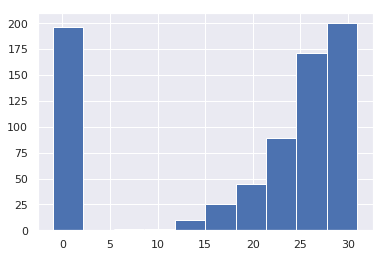

In [16]:
ax = co2['days'].hist()

#ax.figure.savefig("daysHist.png")

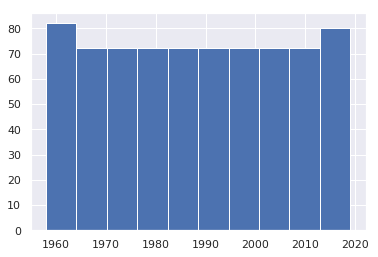

In [17]:
co2['Yr'].hist()

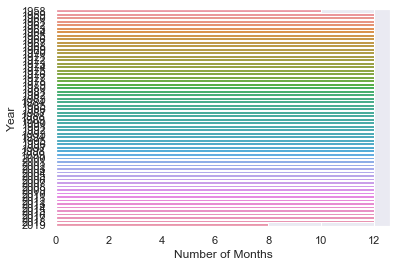

In [95]:
ax = sns.countplot(data=co2, y="Yr")
ax.set_ylabel("Year")
ax.set_xlabel("Number of Months");

#ax.figure.savefig("countplot.png")

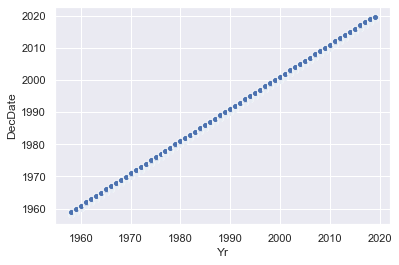

In [17]:
ax = sns.scatterplot(x="Yr", y="DecDate", data=co2)

In [115]:
checkDate = (co2["DecDate"].apply(np.floor) - co2["Yr"]) == 0
checkDate.all()

True

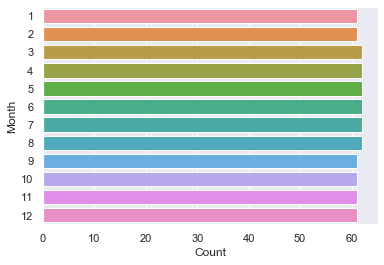

In [20]:
ax = sns.countplot(data=co2, y="Mo")
ax.set_ylabel("Month")
ax.set_xlabel("Count");

In [21]:
co2.groupby(["Mo"]).count()

,Yr,DecDate,Avg,Int,Trend,days
Mo,,,,,,
1,61,61,61,61,61,61
2,61,61,61,61,61,61
3,62,62,62,62,62,62
4,62,62,62,62,62,62
5,62,62,62,62,62,62
6,62,62,62,62,62,62
7,62,62,62,62,62,62
8,62,62,62,62,62,62
9,61,61,61,61,61,61


In [92]:
checkYr = co2.groupby(["Yr"]).count()
checkYr.tail()

,Mo,DecDate,Avg,Int,Trend,days
Yr,,,,,,
2015,12,12,12,12,12,12
2016,12,12,12,12,12,12
2017,12,12,12,12,12,12
2018,12,12,12,12,12,12
2019,8,8,8,8,8,8


In [23]:
checkYr.head()

,Mo,DecDate,Avg,Int,Trend,days
Yr,,,,,,
1958,10,10,10,10,10,10
1959,12,12,12,12,12,12
1960,12,12,12,12,12,12
1961,12,12,12,12,12,12
1962,12,12,12,12,12,12


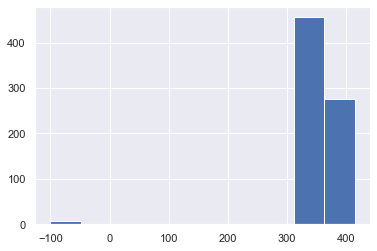

In [69]:
ax = co2['Avg'].hist()

#ax.figure.savefig('AvgHist.png')

In [93]:
co2[co2["Avg"] < 0].count()

Yr         7
Mo         7
DecDate    7
Avg        7
Int        7
Trend      7
days       7
dtype: int64

In [96]:
co2 = co2[co2['Avg'] > 0]

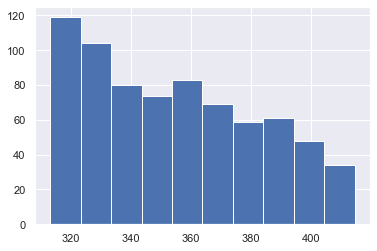

In [74]:
ax = co2['Avg'].hist()

#ax.figure.savefig("revisedAvgHist.png")

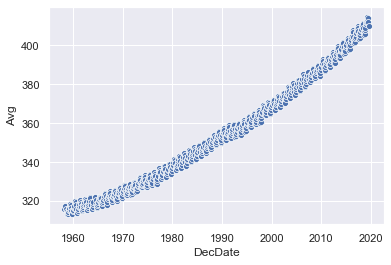

In [54]:
ax = sns.scatterplot(x="DecDate", y="Avg", data=co2)

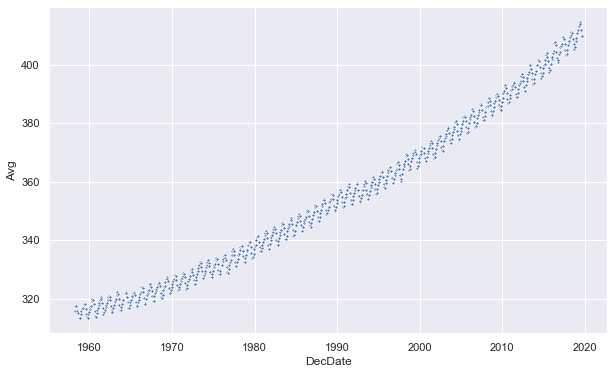

In [75]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x="DecDate", y="Avg", data=co2, s=10)
#ax.figure.savefig("timeScatter.png")

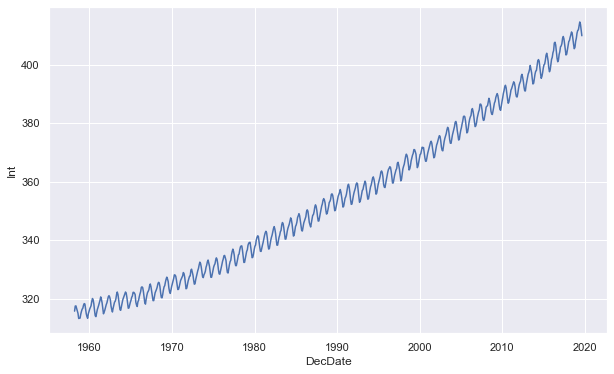

In [97]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(x="DecDate", y="Int", data=co2)
ax.figure.savefig("linePlot.png")

Zoom in on a smaller segment

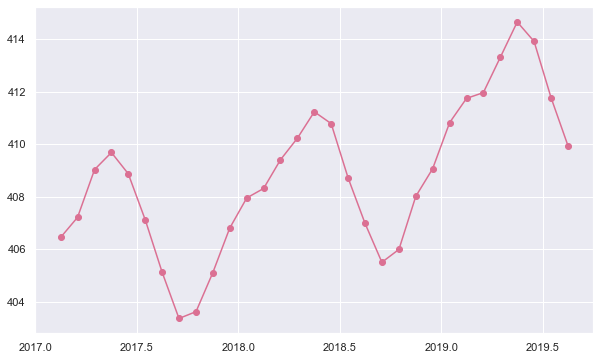

In [98]:
fig = plt.figure(figsize=(10,6))


plt.plot("DecDate", "Avg", data=co2[700:], 
         marker = 'o', color = "palevioletred")

#fig.savefig("zoomTime.png")

overlay the trend data

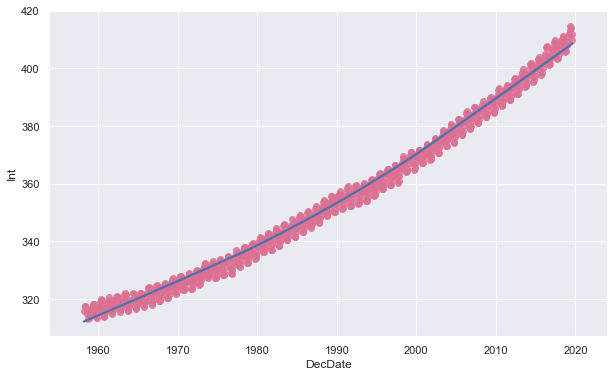

In [57]:
plt.figure(figsize=(10,6))
    
ax = sns.regplot(x='DecDate', y='Int', data = co2, 
                  scatter = True, lowess = True,
                 scatter_kws={"color": "palevioletred"})

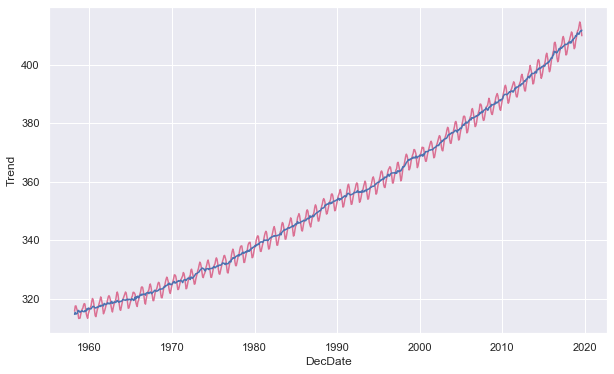

In [83]:
fig = plt.figure(figsize=(10,6))

sns.lineplot(x='DecDate', y='Avg', data = co2, 
                 color = "palevioletred")
sns.lineplot(x="DecDate", y="Trend", data=co2)

fig.savefig("trend.png")